In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
%matplotlib widget
import os
import sys
import importlib
import glob
from scipy.signal import find_peaks


module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import tools
import math_functions as mf
import BodeClass as bc

importlib.reload(tools)
importlib.reload(mf)
importlib.reload(bc)

folder = "C:/Users/Orlando/ownCloud - ORLANDO Marcelo@mycore.cnrs.fr/Doutorado/Apresentaçoes/Experiments"

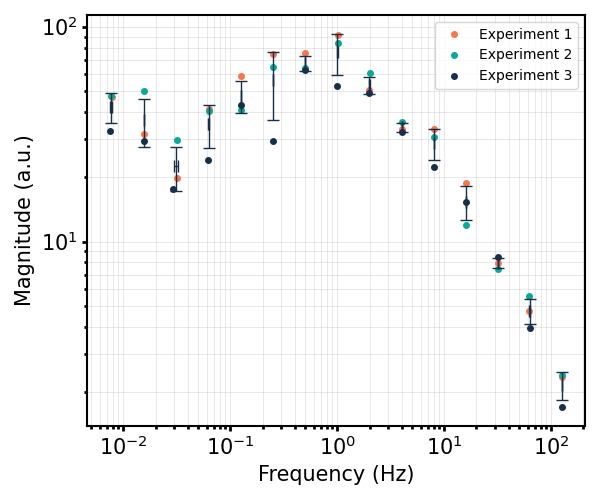

In [3]:
frequency_list = [0.0078125, 0.015625, 0.03125, 0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8, 16, 32, 64, 128][::-1]
names = ["20230720_bode", "20230721_bode", "20230724_bode"]
flash_calib = [402.332, 304.7255953, 338.993692]

line = 2.5
marker = 4

orange = [250/255, 116/255, 79/255]
green = [7/255, 171/255, 152/255]
blue = [24/255, 47/255, 74/255]

colors = [orange, green, blue] 

replicates = []
frequencies = []
amplitudes = []

for i, name in enumerate(names):
    replicates.append(bc.BodeClass(name, "6-20", frequency_list, flash_calib[i], median_filtering_windos_size = 1, 
                                   windowing = "flat-top", padding = True, padding_value = 2000, pic_search_window = 5))
    frequencies.append(replicates[i].fund_freq)
    amplitudes.append(replicates[i].fund_amp)
    
avg_freq = np.mean(frequencies, axis = 0)
avg_amp = np.mean(amplitudes, axis = 0)
std_freq = np.std(frequencies, axis = 0)
std_amp = np.std(amplitudes, axis = 0)

fig, ax = plt.subplots(figsize=(6,5))
fig_title = "Bode plot of the fundamental harmonic"

for i in range(len(names)):
    ax.plot(frequencies[i], amplitudes[i], "o", markersize=marker, color = colors[i], label = f"Experiment {i+1}")
ax.errorbar(avg_freq, avg_amp, xerr=std_freq, fmt ='', linestyle = '', linewidth = 1, yerr=std_amp, capsize=4, color = blue)

ax = tools.bode_plot_axes(ax)

#ax.set_ylim(2e3, 2.5e5)

fig.tight_layout()

fig.savefig(f"{folder}/bode_replicates.png", dpi=300)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


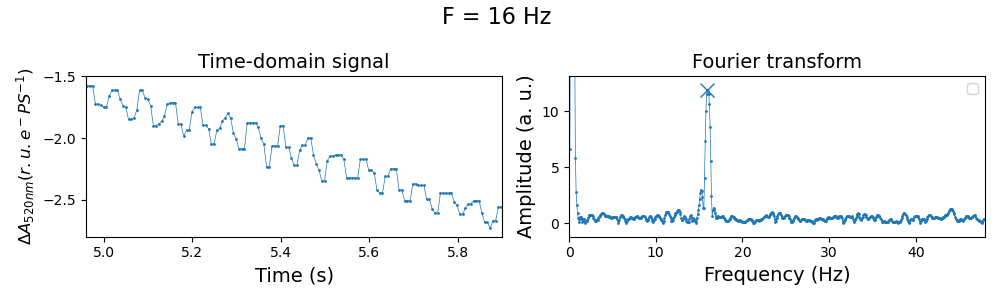

In [38]:
importlib.reload(tools)
fig, ax = tools.compare_bode(frequency_list, [replicates[1]], frequency_to_plot= [16], autoscale = True, max = 3, figsize= (10,4) )
ax[0].set_xlim(4.96,5.9)
ax[0].set_ylim(-2.8, -1.5)
fig.set_size_inches(10,3)
fig.tight_layout()

fig.savefig(f"{folder}/data_16hz.png", dpi=300)


In [ ]:
save_bode = {"Frequency": frequency_list, "Amplitude": avg_amp, "Std": std_amp}
save_bode = pd.DataFrame(save_bode)
save_bode.to_csv(f"{folder}/bode_ECS_data.csv", index=False)

In [ ]:
#frequency_list = [0.0078125, 0.015625, 0.03125, 0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8, 16, 32, 64, 128][::-1]
#name = "20230809_bode"

frequency_list = [0.007813, 0.0625, 0.5, 1, 2, 16, 128][::-1]
name = "20230810_bode"

flash_calib = 493.387576

record_lists = ["6-12", "16-22", "26-32"]

manip = [] 

for i in record_lists:
    manip.append(bc.BodeClass(name, i, frequency_list, flash_calib,
                              index_start = 50, median_filtering_windos_size = 1, windowing= "flat-top", padding = True, padding_value = 8600, pic_search_window = 15))


In [ ]:
old_frequency_list = [0.0078125, 0.015625, 0.03125, 0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8, 16, 32, 64, 128][::-1]
name = "20230809_bode"

controle = bc.BodeClass(name, "6-20", old_frequency_list, 526.784625,
                              index_start = 50, median_filtering_windos_size = 1, windowing= 'flat-top',padding = True, padding_value = 8600, pic_search_window = 15)



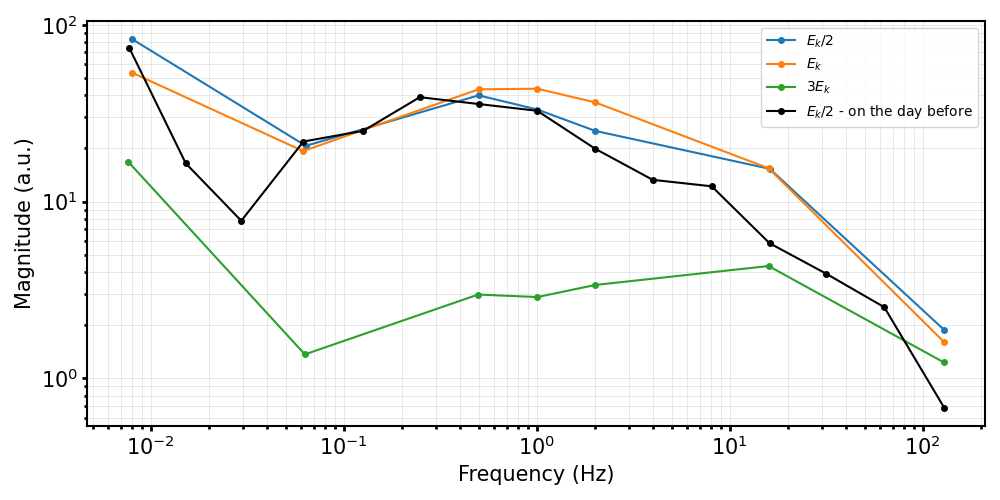

In [ ]:
fig, ax = plt.subplots(figsize = (10,5))
colors = []
legends = ["$E_k/2$", "$E_k$", "$3E_k$"]
for i in range(3):
    colors.append(f"C{i}")
    ax = manip[i].plot_bode(fig = fig, ax = ax, marker_color = colors[i], fmt = "o-" ,show_fit = False, leg = legends[i])

ax = controle.plot_bode(fig = fig, ax = ax, marker_color = "black", fmt = "o-" ,show_fit = False, leg = "$E_k/2$ - on the day before")

fig.savefig(f"{manip[0].fig_folder}/all + ctrl.png", dpi = 300)

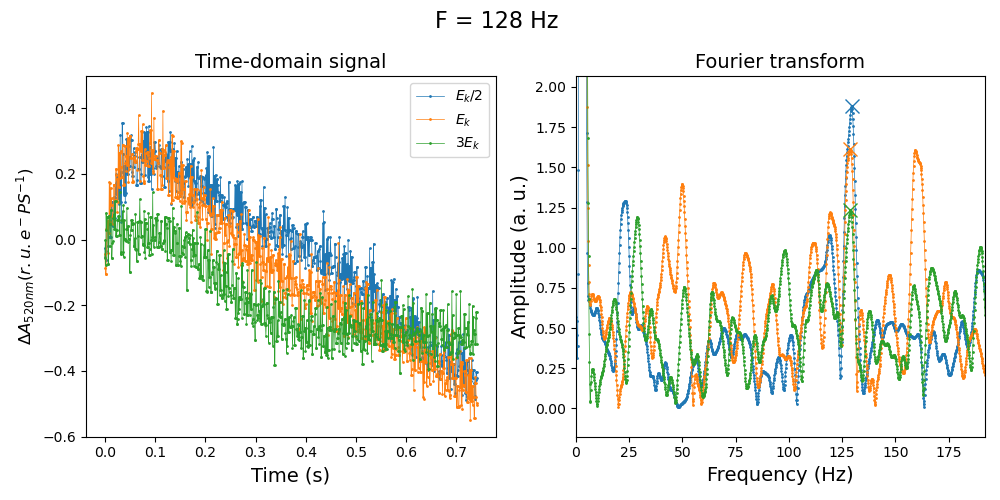

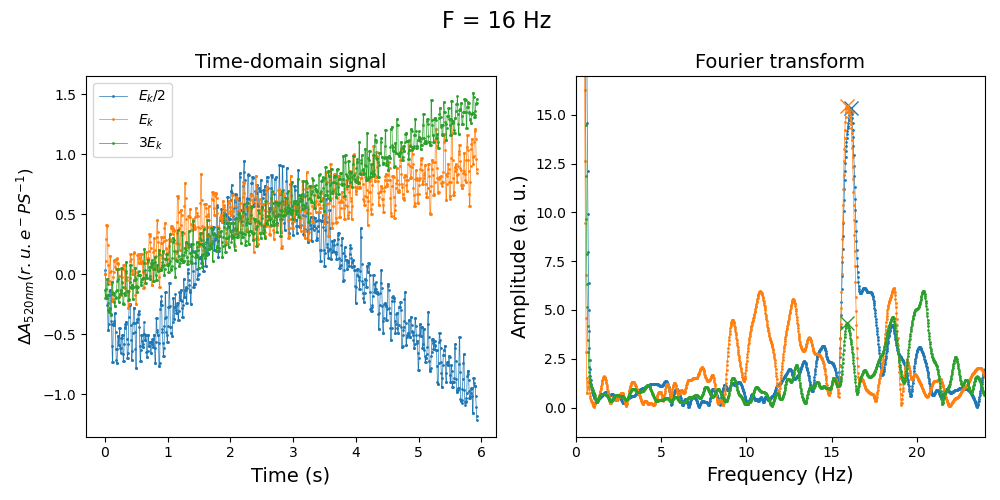

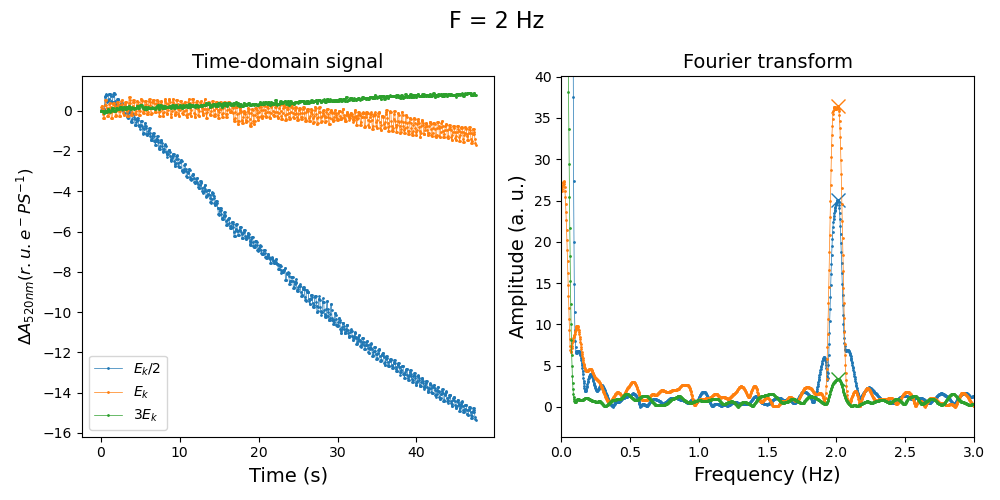

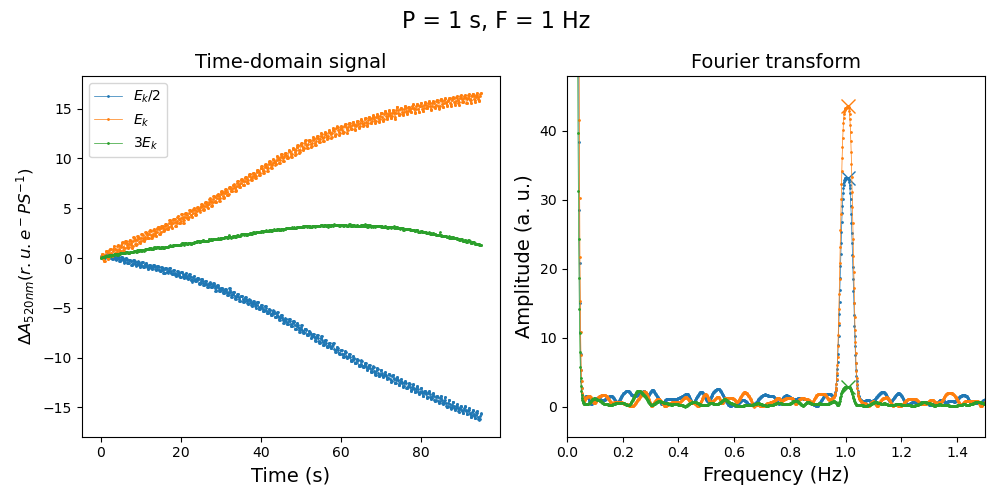

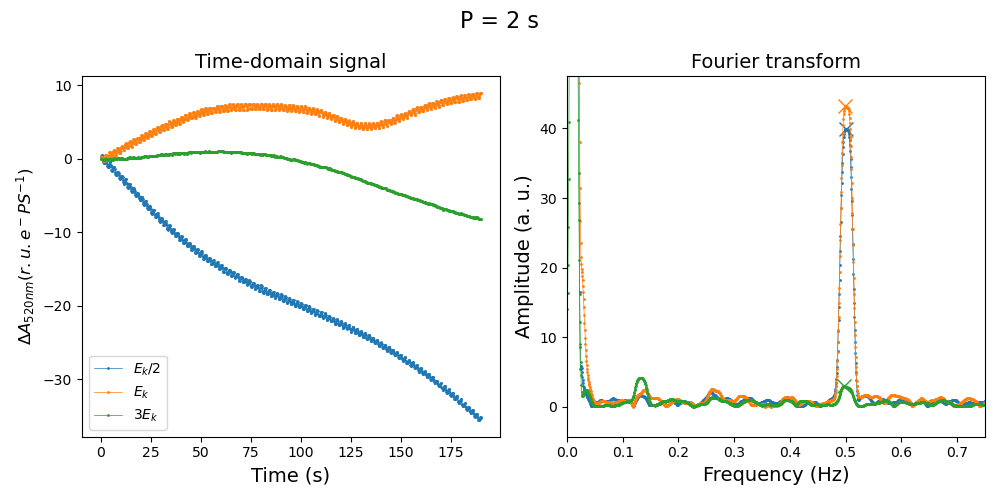

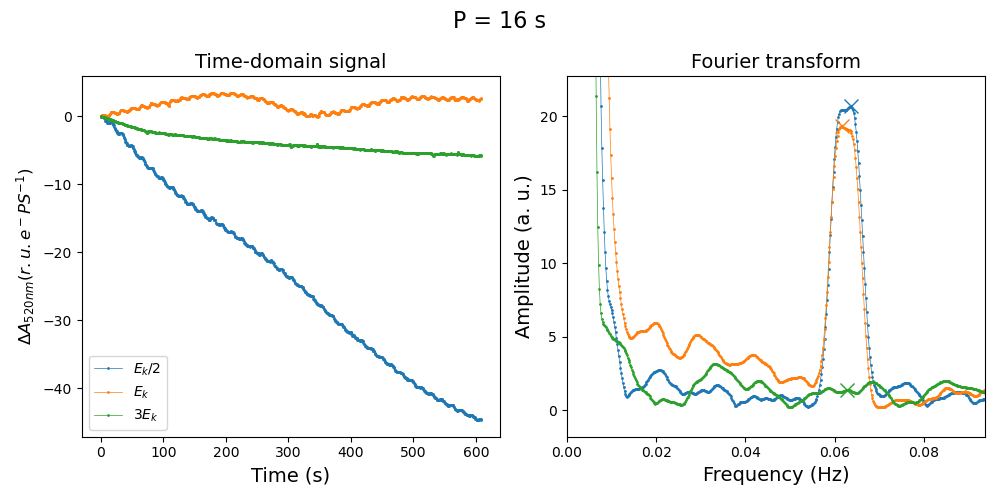

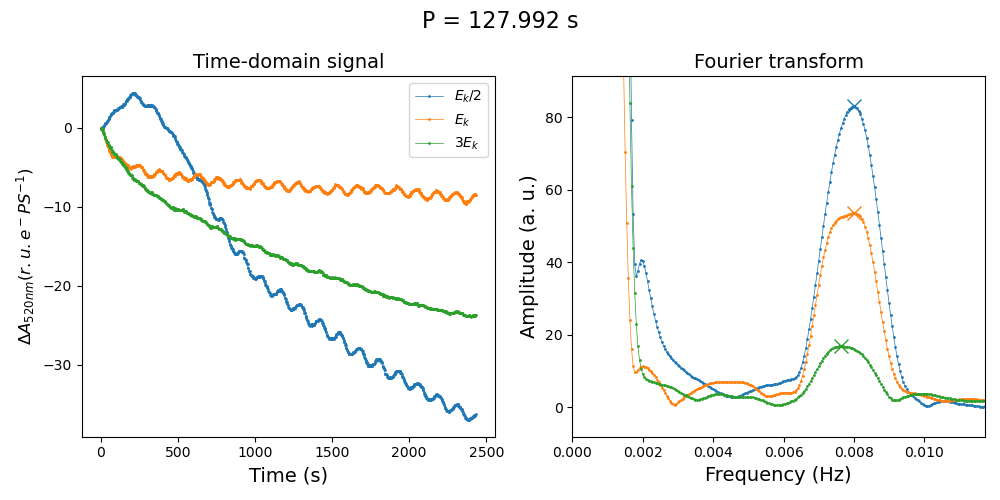

In [ ]:
for i, k in enumerate(frequency_list):
    fig , ax = plt.subplots(1,2, figsize = (10,5))
    if k < 1:
        fig_title = f"P = {1/frequency_list[i]:n} s"
    elif k == 1:
        fig_title = f"P = {1/frequency_list[i]:n} s, F = {frequency_list[i]} Hz "
    elif k > 1:
        fig_title = f"F = {frequency_list[i]} Hz "
    
    fig.suptitle(fig_title, fontsize = 16)
                    
    ax = manip[0].plot_record_TF(f"E{i+6}", fig = fig, ax = ax, leg = "$E_k/2$", color = "C0")
    ax = manip[1].plot_record_TF(f"E{i+16}", fig = fig, ax = ax, leg = "$E_k$", color = "C1")
    ax = manip[2].plot_record_TF(f"E{i+26}", fig = fig, ax = ax, leg = "$3E_k$", color = "C2")
    
    min = 0.5
    max = 1.5
    
    ax[0].legend()
    xlim = ax[1].get_xlim()
    ax[1].set_xlim([k*min, k*max])
    tools.autoscale_y(ax[1])
    ax[1].set_xlim(0, k*max)
        
    fig.tight_layout()
    

    
    fig.savefig(f"{manip[0].fig_folder}/{fig_title}_compare.png")

In [ ]:
manip = bc.BodeClass(name, "6-20", old_frequency_list, flash_calib=526.784625, index_start = 50, median_filtering_windos_size = 1, windowing= 'flat-top',padding = True, padding_value = 8600, pic_search_window = 15)

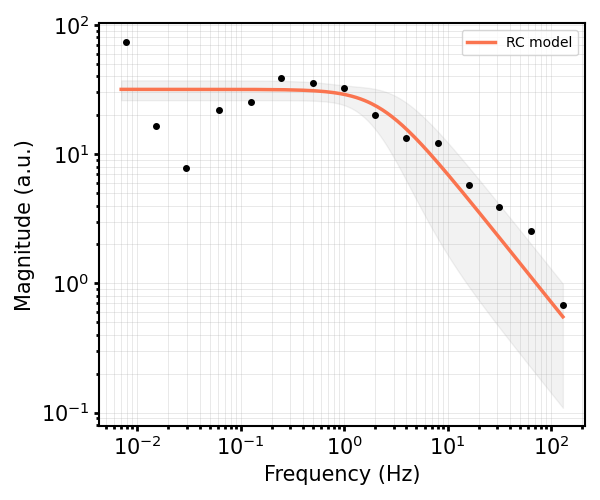

In [ ]:
line = 2.5
marker = 4

orange = [250/255, 116/255, 79/255]

popt_RC, pcov_RC, ffit_RC, afit_RC = tools.RC_transf_fit(manip.fund_freq, manip.fund_amp, 0.007, 130, 1000, p0 =  [10, 0.1])


fig, ax = plt.subplots(figsize=(6,5))
fig_title = "Bode plot of the fundamental harmonic"



ax.plot(ffit_RC, afit_RC, linewidth=line, color = orange, label = "RC model")
ax.plot(manip.fund_freq , manip.fund_amp, "o", markersize=marker, color = 'black')
err = tools.my_err(ffit_RC, popt_RC, pcov_RC, mf.RC_transfer)
ax.fill_between(ffit_RC, afit_RC - err, afit_RC + err, alpha=0.05, color = 'k')

ax = tools.bode_plot_axes(ax)

#ax.set_ylim(2e3, 2.5e5)

fig.tight_layout()

fig.savefig(f"{manip.folder}/Figures/bode_replicates.png", dpi=300)

In [ ]:
y = mf.RC_transfer(np.asarray(frequency_list), popt_RC[0], popt_RC[1])
y

array([  1.92159272,   3.84232714,   7.67779931,  15.30112349,
        30.17776057,  57.28178945,  96.92632778, 132.61386496,
       149.96230794, 155.47759392, 156.9541848 , 157.3299531 ,
       157.42431763, 157.44793531, 157.45384139])

In [ ]:
np.mean(frequencies, axis = 0)

NameError: name 'frequencies' is not defined

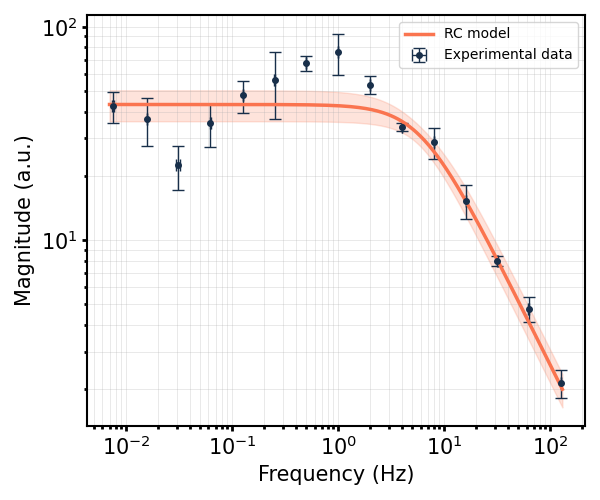

In [ ]:
importlib.reload(tools)
importlib.reload(mf)

fig, ax = plt.subplots(figsize=(6,5))
fig_title = "Bode plot of the fundamental harmonic"
ax.errorbar(avg_freq, avg_amp, xerr=std_freq, fmt ='o', markersize = marker, linestyle = '', linewidth = 1, yerr=std_amp, capsize=4, color = blue, label = "Experimental data")
ax = tools.plot_model(ax, "RC", avg_freq, avg_amp, sigma = std_amp)
#ax = tools.plot_model(ax, "sec_ord", avg_freq, avg_amp, sigma = std_amp, p0 = fit_params)

ax = tools.bode_plot_axes(ax)
#ax.set_ylim(2e3, 1.8e5)

fig.tight_layout()
fig.savefig(f"{folder}/bode_model.png", dpi=300)

In [ ]:
avg_freq[:-3]

array([1.26709402e+02, 6.26333760e+01, 3.17841880e+01, 1.59989316e+01,
       8.01333333e+00, 4.01333333e+00, 1.99333333e+00, 1.00333333e+00,
       5.00833333e-01, 2.51666667e-01, 1.26250000e-01, 6.25000000e-02])

In [ ]:
popt, pcov, ffit, afit = tools.RC_transf_fit(avg_freq, avg_amp, 0.007, 130, 1000, p0 =  [10, 0.1], sigma = std_amp)

In [ ]:
err=np.array([tools.my_err_vec(x, popt, pcov, mf.RC_transfer) for x in ffit])

fig, ax = plt.subplots()
ax.plot(ffit, afit, linewidth=line, color = orange)
ax.fill_between(np.linspace(0.007, 130, 1000), afit-err, afit+err, alpha=0.2, color = orange)
ax = tools.bode_plot_axes(ax)

AttributeError: module 'tools' has no attribute 'my_err_vec'

In [ ]:
x = 1
tools.my_err_vec(x, popt, pcov, mf.sec_ord_transfer)

4672.423620120835

In [1]:
popt

NameError: name 'popt' is not defined

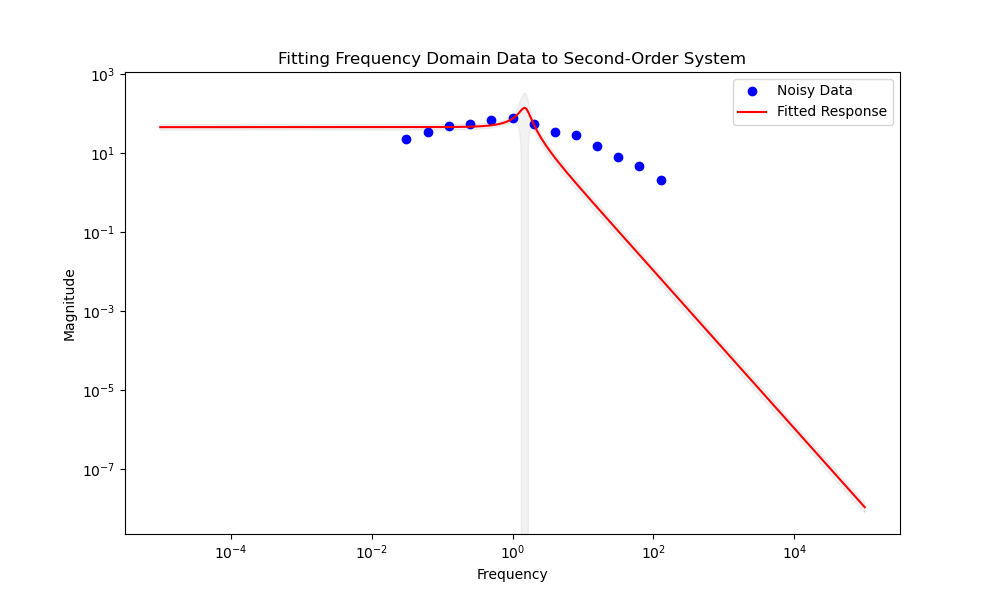

Fitted Parameters:
K: 4200.742537769305
wn: 9.572322414489879
zeta: -0.16490969798001434


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the second-order transfer function
def second_order_transfer_function(freq, K, wn, zeta):
    s = 2j * np.pi * freq
    return np.abs(K / (s**2 + 2 * zeta * wn * s + wn**2))

# Generate example frequency domain data
freq =  avg_freq[:-2] # Frequency values
data_noisy = avg_amp[:-2]

# Fit the data to the second-order transfer function
initial_guess = [1.0, 40.0, 0.05]  # Initial guess for parameters
fit_params, pcov = curve_fit(second_order_transfer_function, freq, data_noisy, p0=initial_guess)

# Calculate the fitted transfer function
freqfit = np.logspace(-5, 5, 1000)
fit_data = second_order_transfer_function(freqfit, *fit_params)

# Plot the original data and the fitted response
plt.figure(figsize=(10, 6))
plt.plot(freq, data_noisy, 'bo', label='Noisy Data')
plt.plot(freqfit, fit_data, 'r-', label='Fitted Response')
err = tools.my_err(freqfit, fit_params, pcov,second_order_transfer_function)
plt.fill_between(freqfit, fit_data - err, fit_data + err, alpha=0.05, color = 'k')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.legend()
plt.title('Fitting Frequency Domain Data to Second-Order System')
plt.show()

# Print the fitted parameters
print("Fitted Parameters:")
print("K:", fit_params[0])
print("wn:", fit_params[1])
print("zeta:", fit_params[2])


In [ ]:
avg_freq[:-3]

array([1.26709402e+02, 6.26333760e+01, 3.17841880e+01, 1.59989316e+01,
       8.01333333e+00, 4.01333333e+00, 1.99333333e+00, 1.00333333e+00,
       5.00833333e-01, 2.51666667e-01, 1.26250000e-01, 6.25000000e-02])

In [ ]:
old_frequency_list = [0.0078125, 0.015625, 0.03125, 0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8, 16, 32]
old_recs = "37, 36, 35, 34, 33, 32, 31, 11, 41, 42, 45, 49, 51"
old_bode = bc.BodeClass("20230519_WT4A_ECS_bode", old_recs, old_frequency_list, 496.27877,
                        median_filtering_windos_size = 1, windowing = "flat-top", padding = True, padding_value = 2000, pic_search_window = 5)


AttributeError: module 'tools' has no attribute 'my_err_vec'

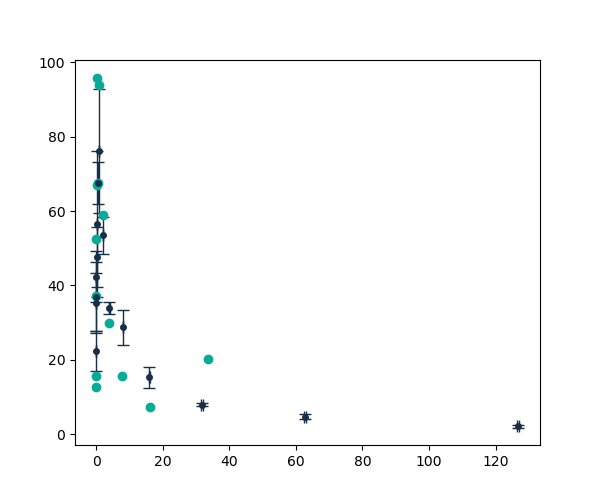

In [ ]:
popt_RC, pcov_RC, ffit_RC, afit_RC = tools.RC_transf_fit(avg_freq, avg_amp, 0.007, 130, 1000, p0 =  [10, 0.1], sigma = std_amp)


fig, ax = plt.subplots(figsize=(6,5))
fig_title = "Bode plot of the fundamental harmonic"
#ax.plot(ffit_RC, afit_RC, linewidth=line, color = orange, label = "RC model")
ax.errorbar(avg_freq, avg_amp, xerr=std_freq, fmt ='o', markersize = marker, linestyle = '', linewidth = 1, yerr=std_amp, capsize=4, color = blue, label = "New experiments")
ax.plot(old_bode.fund_freq, old_bode.fund_amp, 'o', markersize = 6, linewidth = 1, color = green, label = "First experiment (poster)")

RC_err_neg=[mf.RC_transfer(x,*(popt_RC-2*tools.my_err_vec(x, pcov_RC))) for x in ffit_RC]
RC_err_pos=[mf.RC_transfer(x,*(popt_RC+2*tools.my_err_vec(x, pcov_RC)))for x in ffit_RC]

#ax.fill_between(np.linspace(0.007, 130, 1000), RC_err_neg, RC_err_pos, alpha=0.2, color = orange)



ax = tools.bode_plot_axes(ax)
#ax.set_ylim(2e3, 1.8e5)

fig.tight_layout()
fig.savefig(f"{folder}/bode_model_compare.png", dpi=300)

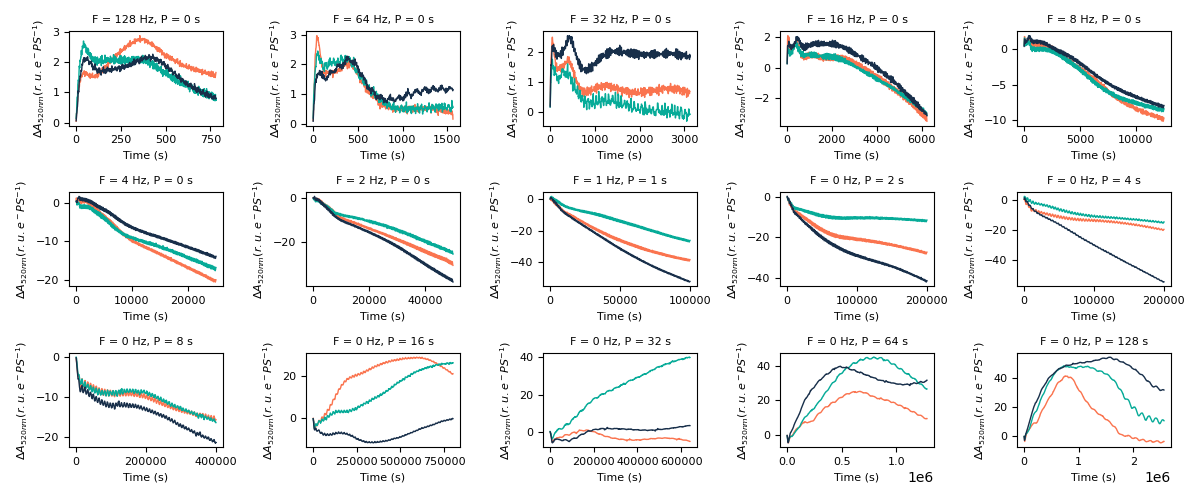

In [ ]:
fig, ax = plt.subplots(3,5,figsize=(12,5))
ax = ax.flatten()
aux = 0
for j, frequency in enumerate(frequency_list):
    for i, name in enumerate(names):
        ax[aux].plot(replicates[i].bode_times[j], replicates[i].bode_data[j], linewidth=1, color = colors[i], label = f"Experiment {i+1}")
    ax[aux].set_title(f"F = {frequency:.0f} Hz, P = {1/frequency:.0f} s", fontsize = 8)
    ax[aux].set_xlabel("Time (s)", fontsize = 8)
    ax[aux].set_ylabel("$ΔA_{ 520 nm} (r. u. e^- PS^{-1})$", fontsize = 8)
    ax[aux].tick_params(axis='both', which='major', labelsize=8)
    aux = aux + 1
fig.tight_layout()

fig.savefig(f"{folder}/bode_time.png", dpi=300)

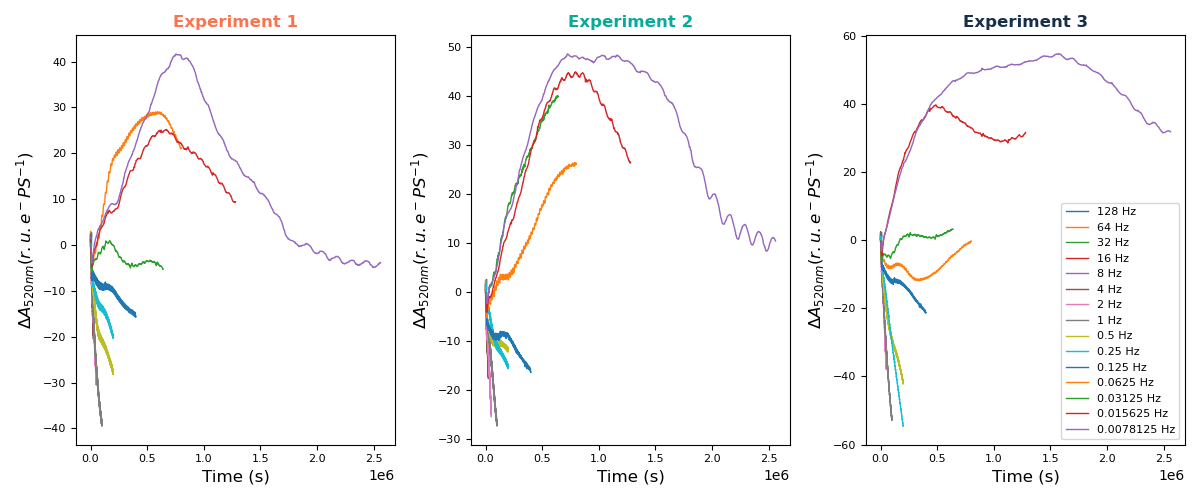

In [ ]:
fig, ax = plt.subplots(1,3,figsize=(12,5))
ax = ax.flatten()
for i, name in enumerate(names):
    for j, frequency in enumerate(frequency_list):
        ax[i].plot(replicates[i].bode_times[j], replicates[i].bode_data[j], linewidth=1, label = f"{frequency} Hz")
    ax[i].set_title(f"Experiment {i+1}", fontsize = 12, color = colors[i], fontweight = "bold")
    ax[i].set_xlabel("Time (s)", fontsize = 12)
    ax[i].set_ylabel("$ΔA_{520 nm} (r. u. e^- PS^{-1})$", fontsize = 12)
    ax[i].tick_params(axis='both', which='major', labelsize=8)
ax[2].legend(fontsize = 8)
fig.tight_layout()

fig.savefig(f"{folder}/bode_derive.png", dpi=300)

In [ ]:
# Create two arrays to concatenate
a = np.array([10])
b = np.ones(2)

# Concatenate the arrays along axis 0
c = np.concatenate((a, b), axis=0)

print(c)

[10.  1.  1.]
